# Aprendizaje no supervisado

Cuando se trata de problemas del mundo real, la mayoria de las veces, los datos no vienen con etiquetas predefinidas.

En el aprendizaje NO supervisado, los modelos se ajustan a las observaciones; no hay un conocimiento a priori, no hay un conjunto de entrenamiento del cual se conocen sus salidas correspondientes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn

### Clasificacion (Clustering)

Podemos utilizar este tipo de aprendizaje para trabajar con agrupaciones de datos sin etiquetar, solo necesitamos sus caracteristicas y esperar que el modelo encuentre algun patron para realizar la clasificacion.

#### **Ejemplo:** *K-means*

- Conocido como el algoritmo de **Lloyd**
- Divide un conjunto de datos de N muestras en `K` grupos separados
- Cada grupo descripto por la media de sus muestras, o *centroides*
- El objetivo del algoritmo es elegir estos **centroides** de forma de que se minimice la *inercia*, o *summa de cuadrados* dentro del grupo
    - La inercia asume que los conglomerados son *convexos*, lo que no siempre es así
    - Responde mal a grupos alargados o con multiples formas irregulares
- Tiene 3 pasos:
    1. Elige los centroides iniciales
    2. Asigna a cada muestra su centroide más cercano (puede utilizar tanto distancia euclidea u otras)
    3. Crea nuevos centroides tomando el valor medio de todas las muestras asignadas al anterior (el punto promedio de todas las muestras del cluster)
    4. Repite desde 2 hasta que la diferencia entre el nuevo centroide y el anterior es menor a un determinado umbral (el centroide no se movió de forma significativa)
- El algoritmo siempre convergerá, sin embargo, esto puede ser a un minimo local
    - Esto depende, en gran medida, de los centroides iniciales tomados
    - Por eso a menudo el calculo se realiza varias veces con diferentes inicializaciones
    - En `sklean` podemos utilizar el parametro `init` con el valor `k-means++` para que la libreria se encargue de inicializar los centroides de forma de que estos esten distantes entre si, lo que lleva a resultados mejores

In [2]:
from sklearn.cluster import KMeans
from sklearn import datasets

Vamos a utilizar para el ejemplo el dataset `iris` que viene con `sklearn` a modo de ejemplo

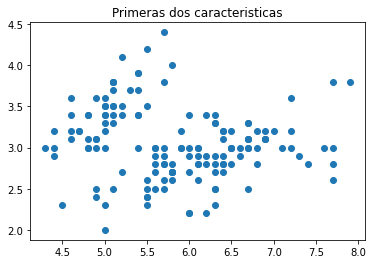

In [3]:
iris = datasets.load_iris()
data = iris.data  # Valores de las caracteristicas

plt.scatter(data[:, 0], data[:, 1])
plt.title("Primeras dos caracteristicas")
plt.show()

- Vizualizando las primeras dos caracteristicas del dataset

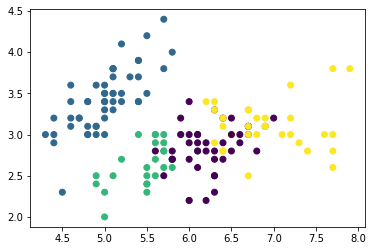

In [4]:
# Suponemos 4 centroides
classifier = KMeans(n_clusters=4, max_iter=2000, init="k-means++")
classifier.fit(data)
predictions = classifier.predict(data)

plt.scatter(data[:, 0], data[:, 1], c=predictions)
plt.show()

In [5]:
score=metrics.adjusted_rand_score(iris.target, predictions) * 100 # data.target son las clasificaciones reales
print("Porcentaje de coincidencia: %.2f %%" % score)

Porcentaje de coincidencia: 64.98 %


Podemos probar para distintas cantidades de centroides y ver cual de todos tiene el mayor porcentaje de aciertos

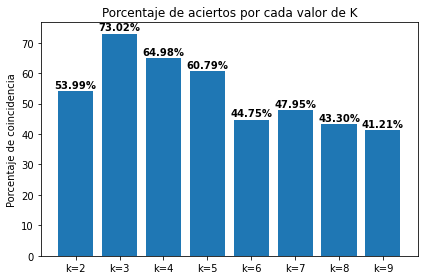

In [6]:
ks = range(2, 10)  # Valores de K que vamos a graficar
scores = []
all_predictions = []
for k in ks:
    classifier = KMeans(n_clusters=k, max_iter=2000, init="k-means++")
    classifier.fit(data)
    predictions = classifier.predict(data)
    all_predictions.append(predictions)
    scores.append(metrics.adjusted_rand_score(iris.target, predictions)*100)
    
fig, ax = plt.subplots()

ax.set_ylabel("Porcentaje de coincidencia")

# Seteamos las separaciones del eje X
xticks = range(len(scores))
ax.set_xticks(xticks)

# Seteamos labels para los ticks del eje X
x_labels = [f"k={k}" for k in ks]
ax.set_xticklabels(x_labels)

ax.bar(xticks, scores)

# Mostramos los valores arriba de las barras
for i, score in enumerate(scores):
    ax.text(i, score+1, s="%.2f%%" % score, ha="center", fontweight="bold")

plt.title("Porcentaje de aciertos por cada valor de K")
plt.tight_layout()
plt.show()

- Observamos que con K=3 se obtiene el mayor porcentaje de coincidencia

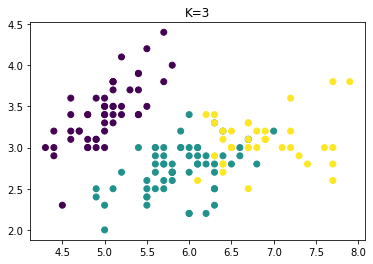

In [7]:
plt.title("K=3")
plt.scatter(data[:, 0], data[:, 1], c=all_predictions[1])
plt.show()

<br/>

El algoritmo K-means posee una variante llamada `MiniBatchKMeans` que utiliza *mini lotes* para reducir el tiempo de cálculo del mismo algoritmo.
- **Mini lotes**: subconjuntos de los datos de entrada, muestrados de forma aleatoria en cada iteracion de entrenamiento

**MiniBatchKMeans** reduce drasticamente la cantidad de calculos necesarios para converger a la solucion, con el costo de producir resultados que son generalmente un poco peores.
- Dependiendo del negocio vamos a elegir uno o el otro

<br/>

#### Ejemplo: *Propagacion por afinidad (Affinity Propagation)*

- Mucho mas lento que la alternativa `KMeans`
- No necesita que se le indique el numero de clusteres, los determina por su cuenta
- Es un algoritmo de clustering del tipo *\"jerarquico\"*
    - Cada punto comienza siendo su propio cluster
        - N puntos => N clusters
    - Luego los clusteres mas cercanos (mas similares) se combinan generando un nuevo cluster
        - Hay diferentes maneras de definir una distancia entre dos clusteres
        - El resultado del algoritmo dependerá de la que se haya elegido utilizar
    - Y asi sucesivamente, hasta que la diferencia (distancia) entre los clusters resulta mayor a cierto umbral
        - Son lo suficientemente diferentes como para decir que son dos clusteres distintos
- En **sklearn** `AffinityPropagation` utiliza como funcion de "affinidad" al *negativo de la distancia euclidea al cuadrado* entre los puntos

Numero de clusters estimados:  3
Porcentaje de coincidencia: 80.22 %


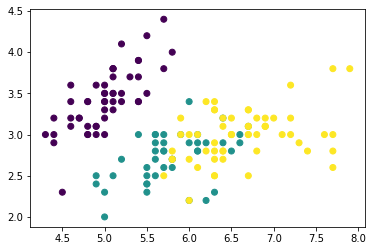

In [8]:
from sklearn.cluster import AffinityPropagation

classifier = AffinityPropagation(preference=-50, random_state=None)
classifier.fit(data)

cluster_centers_indices = classifier.cluster_centers_indices_
labels = classifier.labels_

print("Numero de clusters estimados: ", len(cluster_centers_indices))

predictions = classifier.predict(data)

score = metrics.adjusted_rand_score(iris.target, predictions) * 100
print("Porcentaje de coincidencia: %.2f %%" % score)

plt.scatter(data[:, 0], data[:, 1], c=predictions)
plt.show()

- Utilizando este modelo, se predicen **3** clusters con un porcentaje de acierto mayor al obtenido con *KMeans*

Muy buena clase del MIT sobre el tema: https://www.youtube.com/watch?v=esmzYhuFnds \
Computerphile k-means: https://www.youtube.com/watch?v=KtRLF6rAkyo \
Explicacion de los algoritmos utilizados en **sklearn**: http://www.scikit-learn.org/stable/modules/clustering.html

<br/>

### Procesamiento de datos

#### PCA (Principal Component Analysis)

Es una herramienta que permite transformar el espacio donde reciden nuestros datos (dados por los ejes descriptos por cada una de sus caracteristicas / features) en otros de igual o menor dimension que maximicen la varianza (separacion entre los datos)

De esta forma podemos:
- Lograr una mejor visualizacion de nuestros datos utilizando estos nuevos ejes de coordenadas
- Reducir el numero de dimensiones de nuestros datos
- Alimentar nuestros modelos utilizando los datos transformados pudiendo obtener resultados mas rapida y/o certeramente

- Llamamos a cada uno de estos nuevos ejes "PC-N" (Principal component N), donde PC1 es el eje con mayor importancia
    - Con importancia nos referimos a la "varianza explicada" por cada nuevo componente (eje)
        - Cuan separados estan los datos sobre un determinado eje (sus proyecciones)
    - De esta forma cada componente describe un porcentaje de la informacion sobre la separacion de nuestros datos, de esta forma podemos reducir el numero de dimenciones de nuestros datos seleccionando seleccionando unicamente los N componentes con mayor porcentaje
- Los nuevos datos tramsformados estarán dados por una transformacion lineal dada por los nuevos ejes de coordenadas
    - Por lo tanto, un punto (A, B, C) puede ser transformado a (g, h), donde g y h son valores compuestos por A, B y C en distinta proporcion. Ej: g = c1 * A + c2 * B + c3 * C

**Funcionamiento simplificado**:
- Se busca la recta que mejor se ajuste a los datos
    - Esta, entonces, será PC1
- Se obtienen los demás componentes obtieniendo los ejes normales a la recta anterior
    - Tomando como centro el punto promedio de todos los datos
- Dependiendo de la cantidad de dimensiones que se deseen, se proyectan los puntos transformados al espacio conformado por los N ejes de mayor importancia

**Ejemplo**:

Si graficamos los datos de iris, no siempre es facil visualizar las distintas agrupaciones que pueden tener los datos

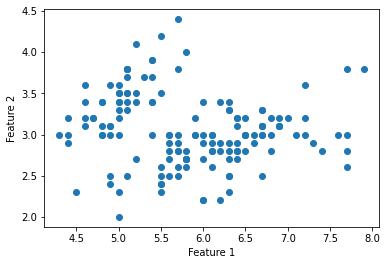

In [77]:
data = iris.data

plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

- De hecho, el dataset de iris tiene 3 features y estamos solo graficando en 2 dimensiones

Cuando tenemos más de 2 dimensiones para graficar, utilizar las primeras dos no siempre resulta en la forma más optima para visualizar e identificar agrupaciones en los datos

Podemos utilizar PCA para obtener los 2 ejes mas optimos:

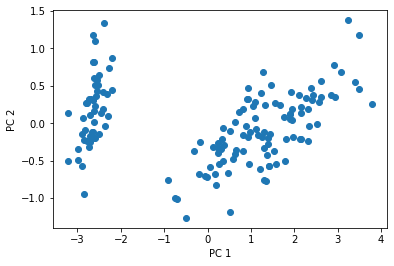

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris.data)

transformed_data = pca.transform(iris.data)
plt.scatter(transformed_data[:,0], transformed_data[:, 1])

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

- Utilizando los nuevos ejes, podemos ver facilemente que los datos pueden agruparse en por lo menos dos categorias
- Con un poco mas de esfuerzo puede verse una 3ra categoria que es muy similar a la segunda

Podemos visualizar, tambien, la importancia de cada componente

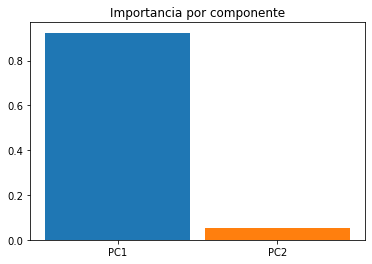

Informacion total obtenida con 2 dimensiones: 97.77 %


In [80]:
variances = pca.explained_variance_ratio_
dimensions = pca.n_components_

width = 0.2
xticks = np.linspace(0, width*1.1, dimensions)

xlabels = []
for n, variance in enumerate(variances, 1):
    xlabels.append(f"PC{n}")
    plt.bar(xticks[n-1], variance, width)

plt.xticks(xticks, xlabels)
plt.title("Importancia por componente")
plt.show()

print(f"Informacion total obtenida con {dimensions} dimensiones: {round(sum(variances) * 100, 2)} %")

- Se observa que los datos se encuentran separados en mayor medida en el componente 1

A modo de ejemplo podriamos graficarlos utilizando solo este eje (1 dimension)

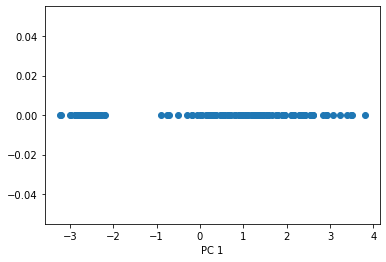

In [84]:
plt.scatter(transformed_data[:,0], [0] * len(data))  # Proyecto sobre el eje PC1

plt.xlabel("PC 1")
plt.show()

- Incluso asi se observan las diferencias entre los distintos conjuntos que conforman los datos

Conociendo las clasificaciones de los datos podemos ver que tan separadas estan en cada espacio vectorial

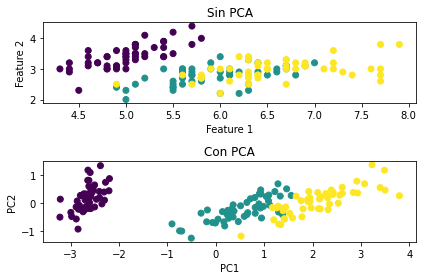

In [97]:
fig, axs = plt.subplots(2, 1)

axs[0].set_title("Sin PCA")
axs[0].set(xlabel="Feature 1", ylabel="Feature 2")
axs[0].scatter(data[:, 0], data[:, 1], c=iris.target)

axs[1].set_title("Con PCA")
axs[1].set(xlabel="PC1", ylabel="PC2")
axs[1].scatter(transformed_data[:,0], transformed_data[:, 1], c=iris.target)

plt.tight_layout()
plt.show()

- Se observa clarame que utilizando PCA, se obtiene un mejor espacio para visualizar los datos

**Links utiles**:
- Buen video explicando PCA: https://www.youtube.com/watch?v=FgakZw6K1QQ
- Computerphile: https://www.youtube.com/watch?v=TJdH6rPA-TI&list=PLzH6n4zXuckpfMu_4Ff8E7Z1behQks5ba&index=8

<br/>

#### Reescalado de datos

Muchas veces las features de nuestros datos tienen escalas muy diferentes. Esto puede llevar a que algunos algoritmos le den mayor prioridad a aquellas features con escalas mas grandes.

Para solucionar esto recurrimos a reescalar nuestros datos para que todas las features utilicen una escala común.

##### MinMaxScaling

Reescala cada feature de un set de datos a valores dentro de un rango dado (un valor minimo y uno maximo).

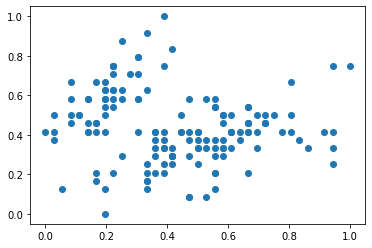

In [107]:
from sklearn import preprocessing

minmax_transformer = preprocessing.MinMaxScaler(feature_range=(0,1))  # Reescalo entre 0 y 1
minmax_transformer.fit(data)

scaled_data = minmax_transformer.transform(data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1])
plt.show()

- Todos los datos de cada feature tienen valores entre 0 y 1

##### Estandarizacion / Eliminacion de la media

Es otra tecnica de reescalado que simplemente centra los datos eliminando el valor promedio de cada feature y luego escala dividiendo por la desviacion estandar de cada una.

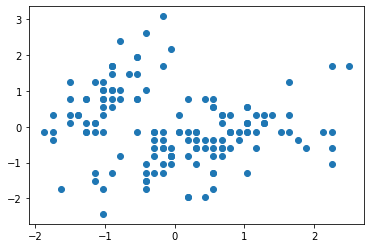

In [108]:
standarizer = preprocessing.StandardScaler().fit(data)

scaled_data = standarizer.transform(data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1])
plt.show()

##### Normalizacion
Se toma cada feature como un vector de `len(data)` dimensiones y se lo normaliza dividiendo cada uno de sus valores por la norma de dicho vector.

Obteniendo un nuevo vector de valores de norma 1.

Existen 3 tipos de normas:
1. **L1:** La suma de todos los valores absolutos del vector
2. **L2:** La raiz cuadrada de la suma de todos los valores al cuadrado del vector
    - Esta es la mas conocida
3. **max:** El valor maximo del vector

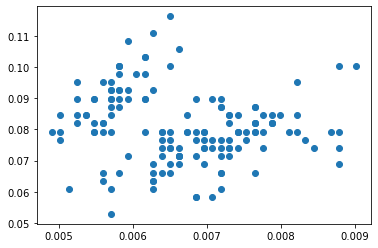

In [152]:
normalized_feature1 = preprocessing.normalize(data[:, 0].reshape(1, -1), norm='l1')
normalized_feature2 = preprocessing.normalize(data[:, 1].reshape(1, -1), norm='l2')
normalized_feature3 = preprocessing.normalize(data[:, 2].reshape(1, -1), norm='max')

plt.scatter(normalized_feature1, normalized_feature2)
plt.show()

- Podemos verificar que la norma de las features normalizadas resulta 1:

In [165]:
norm1 = np.sum(np.abs(normalized_feature1))  # Norma L1
norm2 = np.sqrt(np.sum(normalized_feature2 ** 2))  # Norma L2 
norm3 = np.max(normalized_feature3)  # Norma max

print(f"Norma de la feature 1 normalizada (L1): {norm1}")
print(f"Norma de la feature 2 normalizada (L2): {norm2}")
print(f"Norma de la feature 3 normalizada (max): {norm3}")

Norma de la feature 1 normalizada (L1): 1.0
Norma de la feature 2 normalizada (L2): 0.9999999999999998
Norma de la feature 3 normalizada (max): 1.0


##### Binarizacion
Se utiliza cuando se desea convertir una feature de caracteristicas numericas en un vector booleano (0s y 1s).

Se suele usar en el campo del procesamiento de imagenes digitales para transformar una imagen a color a una binaria (en blanco y negro).

La clase `Binarizer` recibe un parametro *"threshold"* que indica a partir de que valor cambiar de 0 a 1.

In [164]:
binarizer = preprocessing.Binarizer(threshold=2)  ## a partir del 2, todos los valores se transforman a 1

data = np.array([[1, 1, 3], 
                 [3, 3, 1]])

transformed_data = binarizer.transform(data)
print(transformed_data)

[[0 0 1]
 [1 1 0]]
